# 1. Connecting Colab to Drive

<img src="https://blogger.googleusercontent.com/img/a/AVvXsEgTxDrQyiIVttSW5ydDvG86Vm8zExuONiCekUyH79rcatlqEEXRoP_AYzLCyts81uL6upUTHuKvtu8G9BOxOYPaYlNg3lcG-sQT_j_MsxqmMJ6WFMuf0QDYo7PHuagDpelkijvxPF6ovdCh_kR_hY7l1yP7H3GPt7cJJZBBN8cwOHzmRTwmC51gbe7y_Hc=w640-h322" width="740"/>

<img src="https://blogger.googleusercontent.com/img/a/AVvXsEjqCdzH2tWtWMzrhSJhHCGM0SzJLvbvutSw1pHR6lUouE9mp9kG_5kT6DUrc6u7yEj2RuS4h5n51wUGKSd7YgxYlAAWVjLLDzhoRiNgnD5Jz2945SGjaTwWEvZK8CZQThRW4y8po3jpgVRtdlTIAgSHRB2-
mgUqSMkYtNmH1h5KkD66jfNy4yxWwsEQGlM=w640-h308" width="740"/>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
cd drive/MyDrive/Workshop_Objdet

[Errno 2] No such file or directory: 'drive/MyDrive/Workshop_Objdet'
/content


# 2. Check the GPU Runtime

In [ ]:
!nvidia-smi

Wed Nov 20 06:27:48 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# 3. Make "workshop_objdet" dir as HOME

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


# 4. Installing YOLO

In [ ]:
!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.5/112.6 GB disk)


# 5. Download Custom Dataset
<img src="https://blogger.googleusercontent.com/img/a/AVvXsEic5ZrzsXMPVInaNQbrAR1uNz5lWJh-6U-Mkv96ced6pXoLVNo3I0P3RbzY-7Elq4HnDf5vu_EbcUVnFwTocRhbQGozzOosUXsA5a3mtkYfpUXOS3t42XJ2F_6fx-d2tt2HBFpzaRbn0f3ifpgIvfZOAPBu_3qtKZJR0R3dZWny7wEdj3eSeEF7Od_HkbI=w640-h308" width="740"/>

https://github.com/bake5/workshop_objdet

# 6. Installing Roboflow and Importing Dataset

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Z3xDvl2iR54riw7Emktx")
project = rf.workspace("tumor-detection-fhpa9").project("ws_tumor_det-cdhzw")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to -ws_tumor_det-1 in yolov8:: 100%|██████████| 86/86 [00:00<00:00, 4881.85it/s]


# 7. Model Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=100 imgsz=800 plots=True

/content
100% 49.7M/49.7M [00:00<00:00, 193MB/s]
New https://pypi.org/project/ultralytics/8.3.34 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/-ws_tumor_det-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classe

# 8. Checking the Confusion Matrix

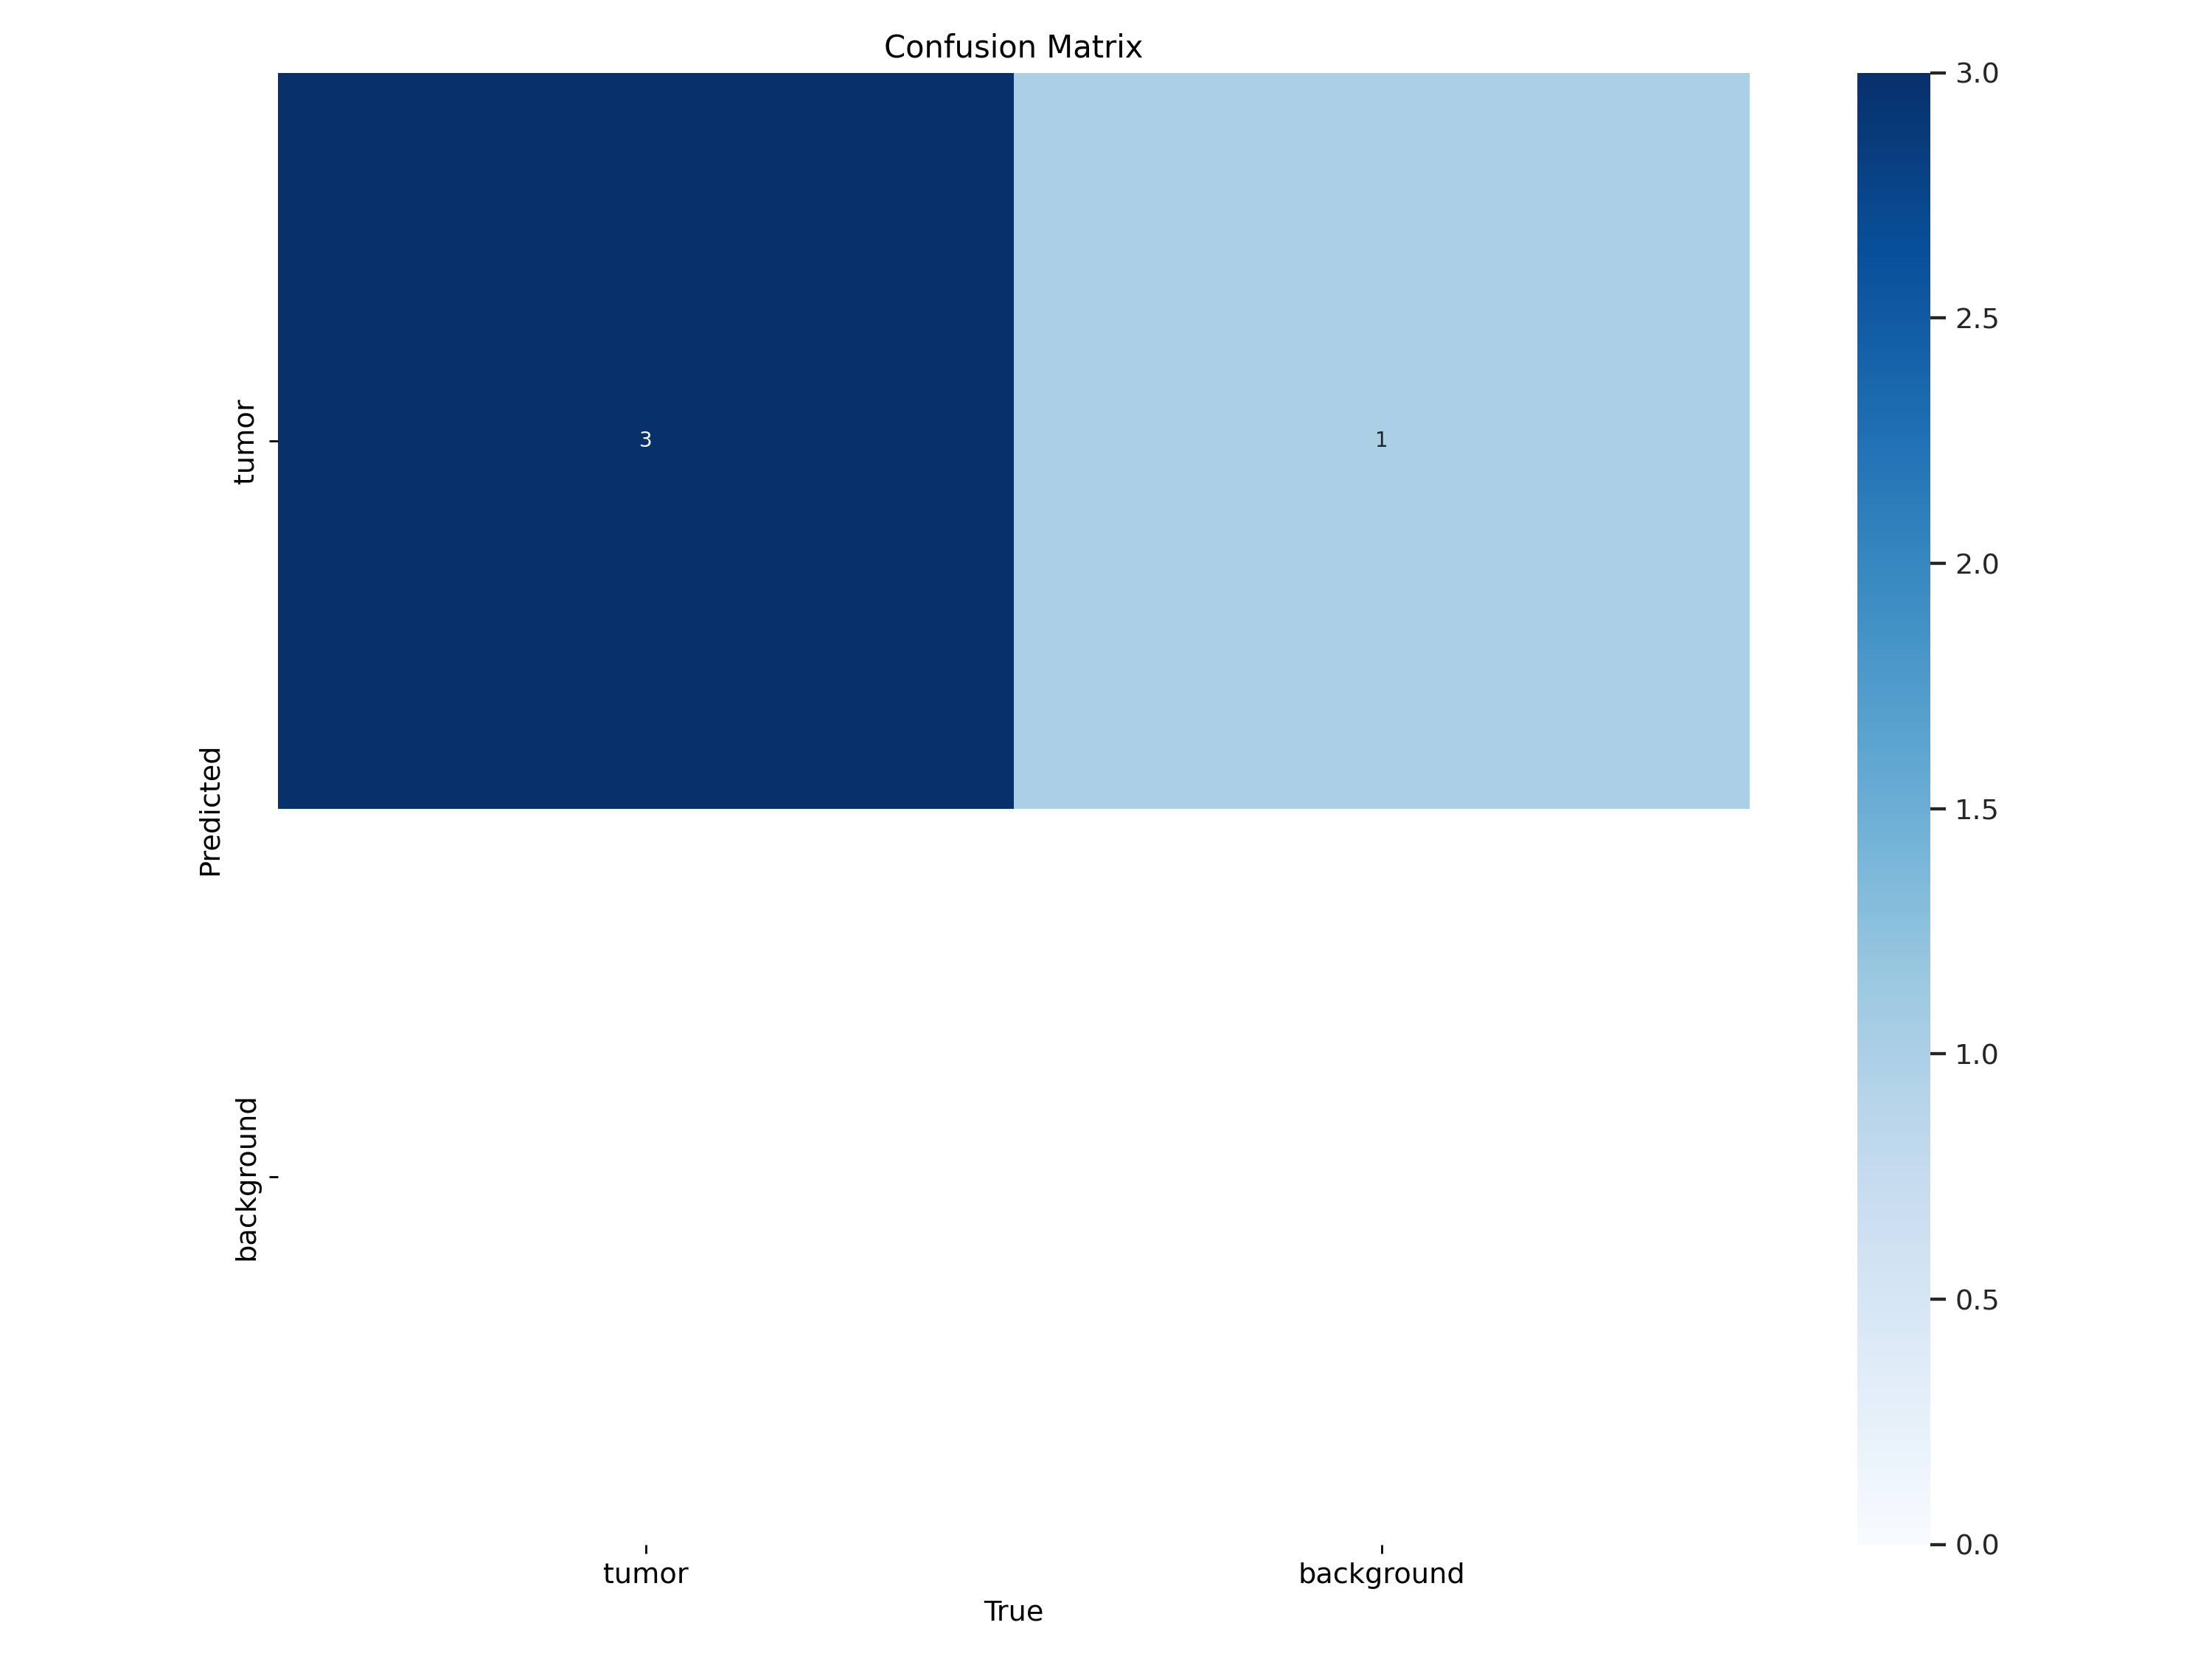

In [ ]:
from IPython.display import Image
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

# 9. Checking the Loss and mAP charts

/content


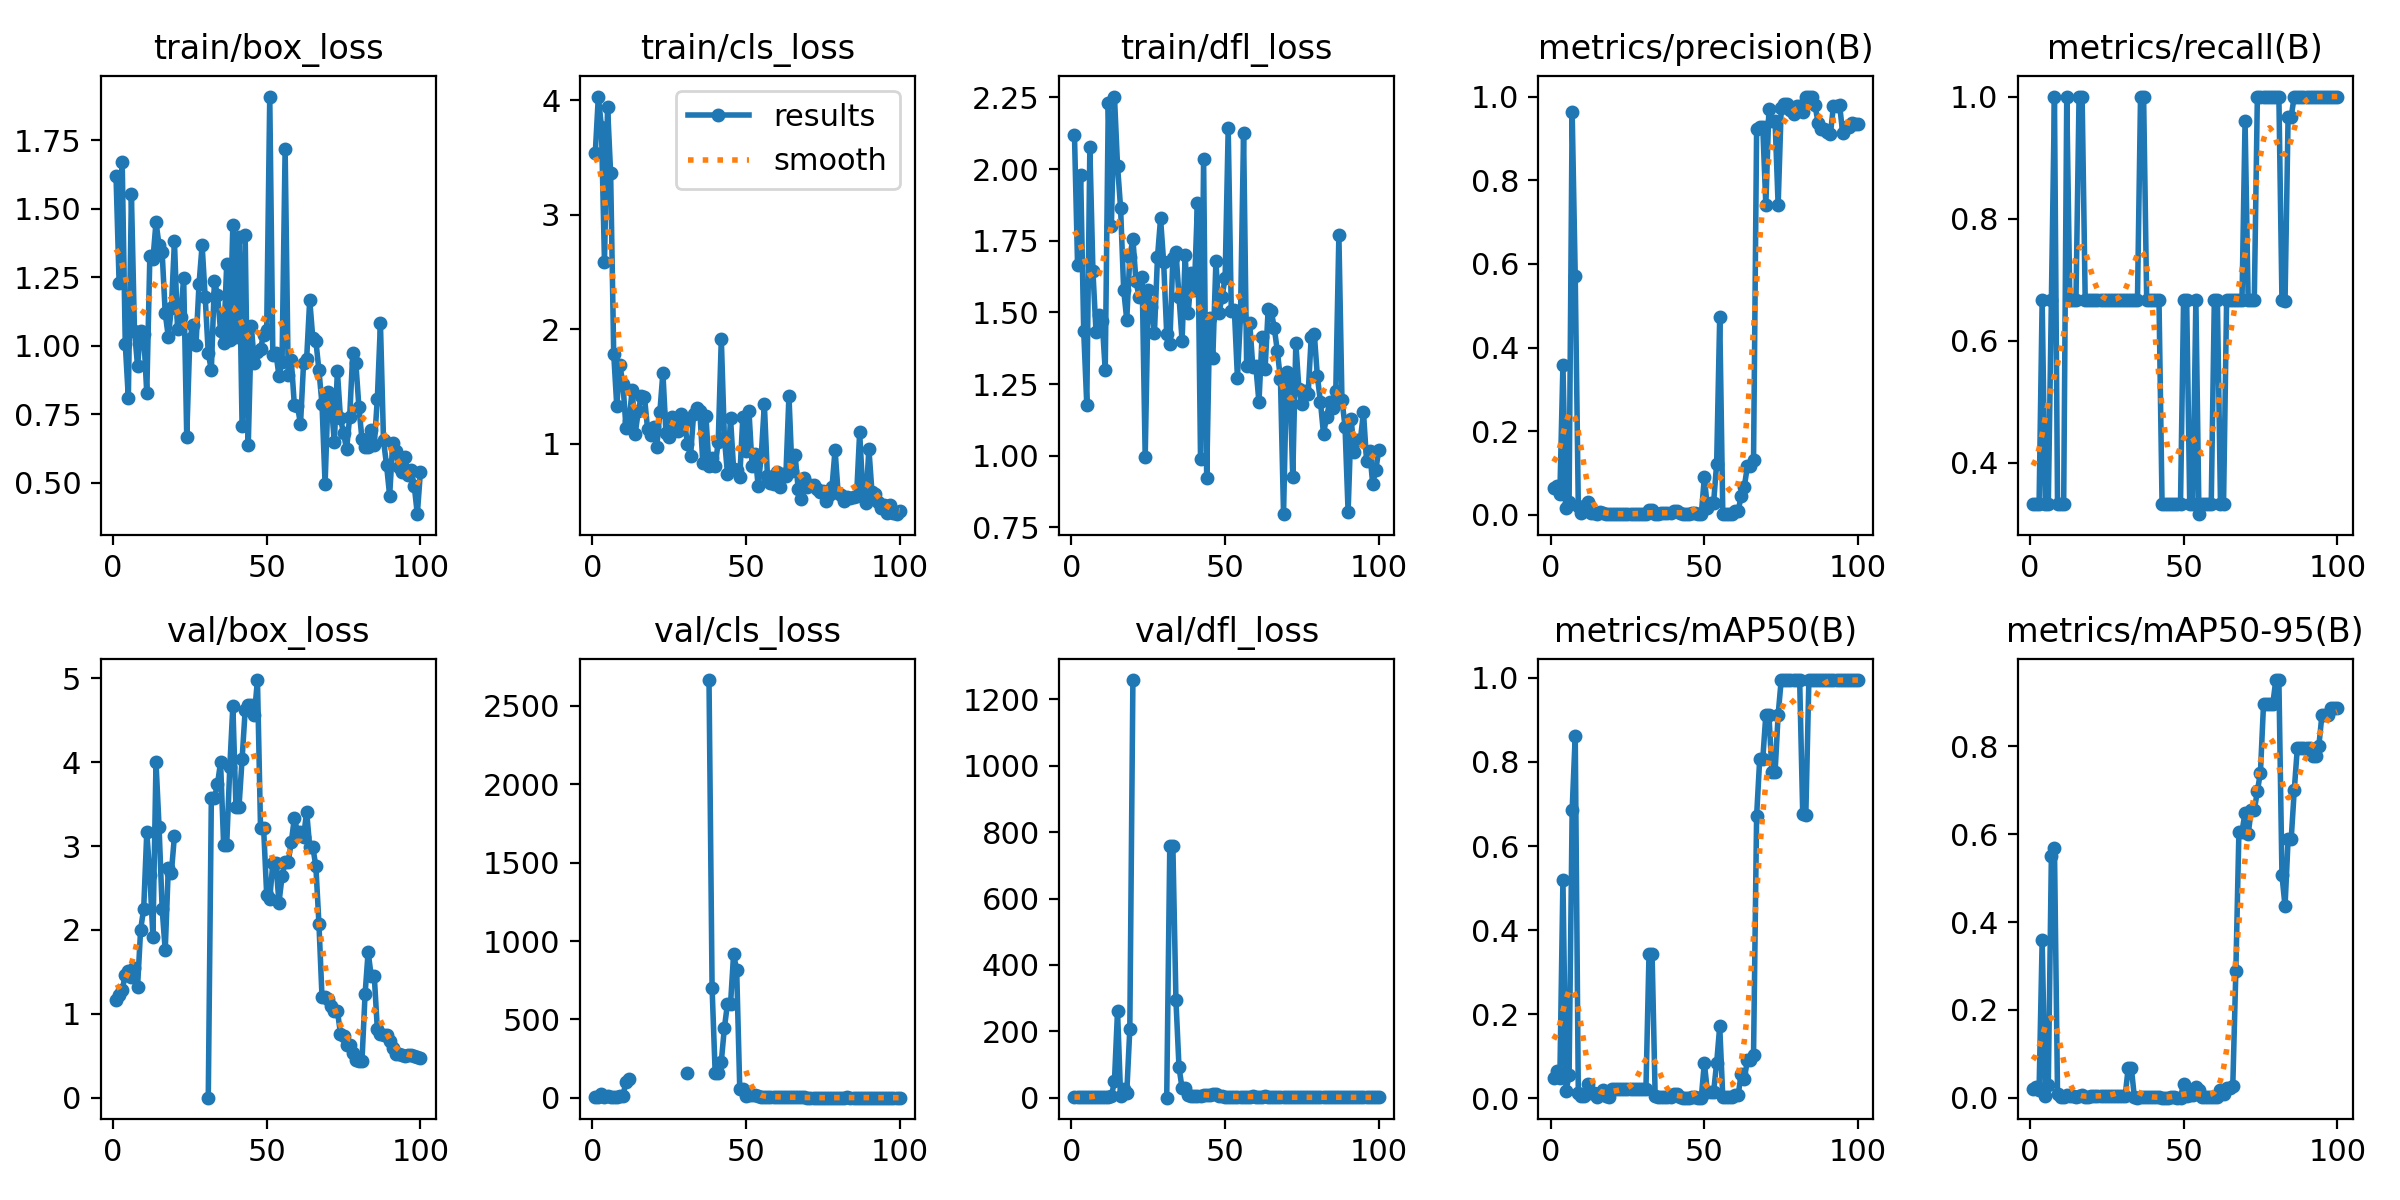

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

# 10. Checking the model predictions in the first validation batch

/content


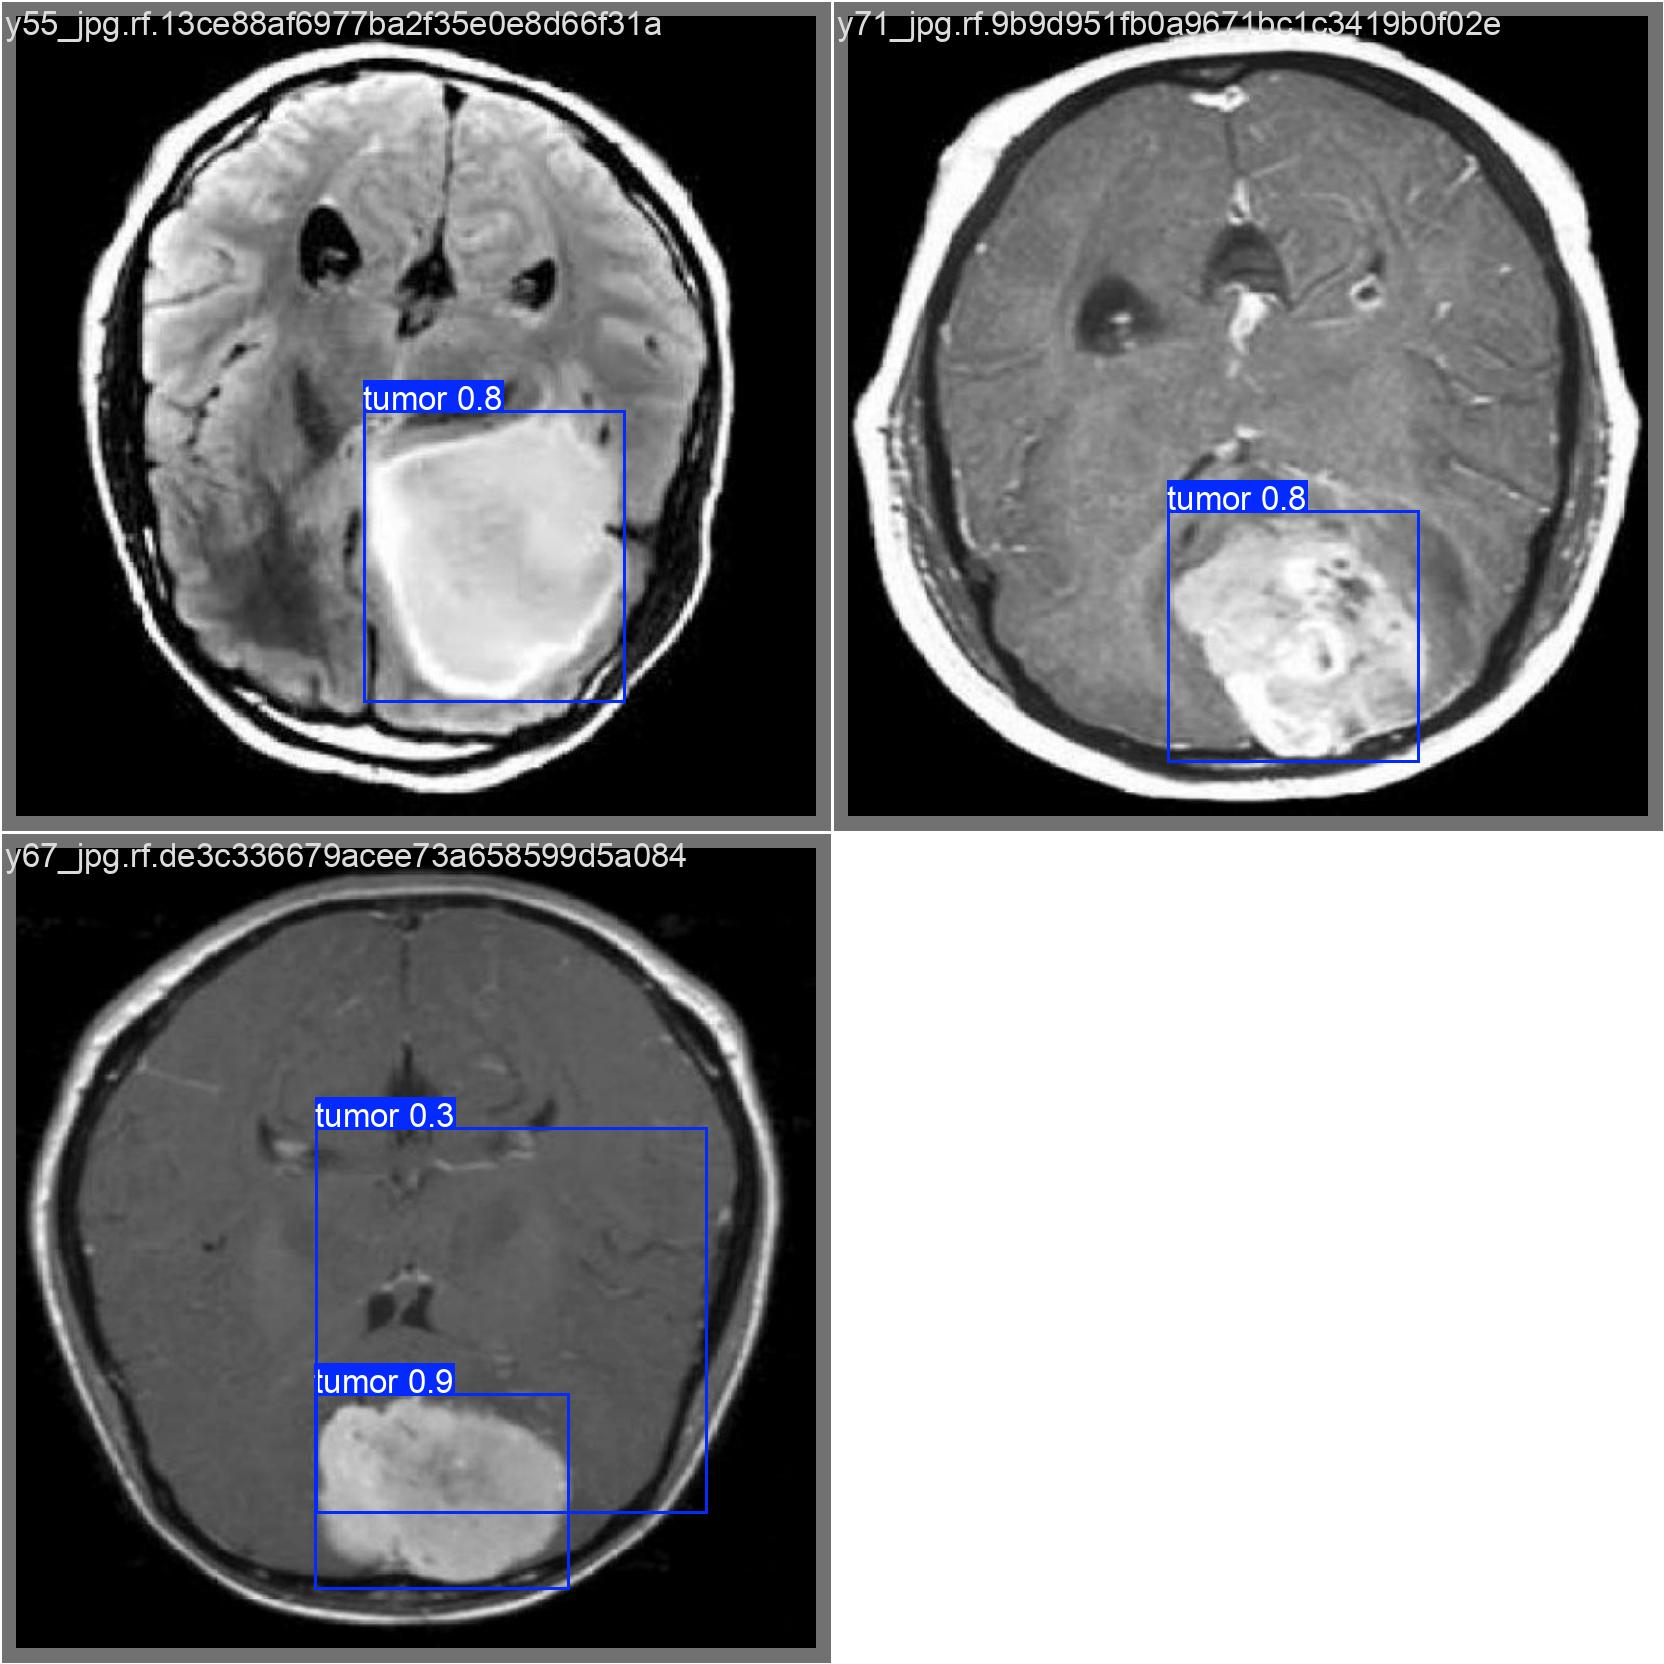

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

# 11. Model Validation

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml




/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/-ws_tumor_det-1/valid/labels.cache... 3 images, 0 backgrounds, 0 corrupt: 100% 3/3 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:01<00:00,  1.32s/it]
                   all          3          3      0.976          1      0.995      0.951
Speed: 0.5ms preprocess, 65.8ms inference, 0.0ms loss, 277.5ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


# 12. Model Testing

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.5 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/-ws_tumor_det-1/test/images/y11_jpg.rf.138a46db90b4790859f02f26d32e8234.jpg: 800x800 1 tumor, 58.9ms
Speed: 7.3ms preprocess, 58.9ms inference, 521.7ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


# 13. Prediction Result Visualization

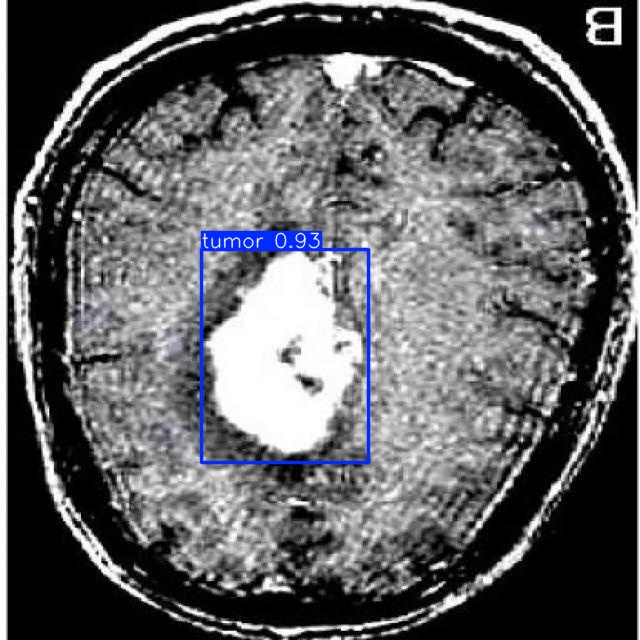

In [ ]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")